In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
from random import uniform, seed
from math import sqrt
import numpy as np
from Cell2D import Cell2D, draw_array
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
palette = sns.color_palette()
colors = 'white', 'red', 'blue', 'orange'
cmap = LinearSegmentedColormap.from_list('cmap', colors)

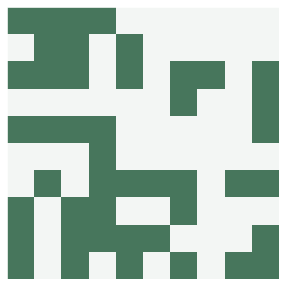

In [19]:
seed(10)

# Initial parameters

# Agents are the houses
class Agent:
    def __init__(self, location,house_value):
        self.location = location
        self.house_value = house_value
    
#     def house_value: 
    
#     def inhabitant_income
    
#     def match_function(self, houses):
    
#     def update


class people:
     def __init__(self, location,income):
        self.location = location
        self.income = income
        
        
        
class grid_houses(Cell2D):
    """Represents a grid of Schelling agents."""
    
    # kernel used for counting a cell's neighbours
    kernel = np.array([[1, 1, 1],
                       [1, 0, 1],
                       [1, 1, 1]], dtype=np.int8)
    
    def __init__(self, n, p, prob_empty):
        """Initializes the attributes.
        
        n: number of rows
        p: happiness threshold on the fraction of similar neighbors
        """
        super().__init__(n)
        self.p = p  # happiness threshold
        self.prob_emp = prob_empty    # probability of empty cells occurring
        self.prob_house = (1 - self.prob_emp)
        # 0 is empty, 1 is red, 2 is blue
        choices = np.array([0, 1], dtype = np.int8)
        probs = [self.prob_emp, self.prob_house]
        # use the numpy routine choice to select the different cells with probability
        self.array = np.random.choice(choices, (n, n), probs)
        
    # def count_neighbors(self):
    # """Surveys neighboring cells.
    #
    # returns: tuple of
    #     empty: True where cells are empty
    #     frac_red: fraction of red neighbors around each cell
    #     frac_blue: fraction of blue neighbors around each cell
    # #     frac_same: fraction of neighbors with the same color
    # # """
    # a = self.array
    # num_neighbors = np.zeros((self.n,self.n))
    # empty = (a==0) # array with true and false for where a=0, that is empty
    # rich =   (a==1)
    # middle =  (a==2)
    # poor = (a==3)
    # #print("empty ", empty, "red", red, "blue", blue)
    # # count red neighbors, blue neighbors, and total
    # num_rich  = correlate2d(rich, self.kernel, **self.options)
    # num_middle = correlate2d(middle, self.kernel, **self.options)
    # num_poor = correlate2d(poor, self.kernel, **self.options)
    # num_neighbors = num_rich+num_middle+num_poor
    #
    # #print("num_neigbours",num_neighbors)
    #
    # # compute fraction of similar neighbors
    #
    # # the next two lines replaces some code in ThinkComplexity2
    # frac_red = np.where(num_neighbors>0, num_red / num_neighbors,0 )
    # frac_blue = np.where(num_neighbors>0, num_blue/ num_neighbors,0 )
    # #print("where num_neighbours is zero ", a[num_neighbors ==0])
    #
    # # for each cell, compute the fraction of neighbors with the same color
    # frac_same = np.where(red, frac_red, frac_blue)
    # #print("frac_red ", frac_red, "frac_blue ", frac_blue, "num_neighbors",num_neighbors )
    #
    # # compute fraction of similar neighbors
    # # for empty cells, frac_same is NaN
    #
    # frac_same[empty] = np.nan
    #
    # return empty, frac_red, frac_blue, frac_same


        
        
    
class grid_agents(Cell2D):
    """Represents a grid of Schelling agents."""
    
    # kernel used for counting a cell's neighbours
    kernel = np.array([[1, 1, 1,1,1],
                       [1, 1, 1,1,1],
                       [1, 1, 0,1,1],
                       [1,1,1,1,1],
                       [1,1,1,1,1]], dtype=np.int8)
    
    def __init__(self, n, p, prob_empty,grid_houses):
        """Initializes the attributes.
        
        n: number of rows
        p: happiness threshold on the fraction of similar neighbors
        """
        super().__init__(n)
        self.p = p  # happiness threshold
        self.prob_emp = prob_empty    # probability of empty cells occurring
        self.prob_rich = (1 - self.prob_emp)/3
        self.prob_middle= (1 - self.prob_emp)/3
        self.prob_poor = (1 - self.prob_emp)/3
        # 0 is empty, 1 is red, 2 is blue
        choices = np.array([0, 1,2,3], dtype = np.int8)
        
        probs = [self.prob_emp, self.prob_rich,self.prob_middle,self.prob_poor]
        # use the numpy routine choice to select the different cells with probability
        
        self.array = np.random.choice(choices, (n, n), probs)
        self.array = np.multiply(self.array,grid_houses.array)

    def draw(self):
        """Draws the cells."""
        return draw_array(self.array, cmap=cmap, vmax=3)
    
    # def count_neighbors(self):
    # """Surveys neighboring cells.
    #
    # returns: tuple of
    #     empty: True where cells are empty
    #     frac_red: fraction of red neighbors around each cell
    #     frac_blue: fraction of blue neighbors around each cell
    #     frac_same: fraction of neighbors with the same color
    # """
    # a = self.array
    # num_neighbors = np.zeros((self.n,self.n))
    # empty = (a==0) # array with true and false for where a=0, that is empty
    # rich =   (a==1)
    # middle =  (a==2)
    # poor = (a==3)
    # #print("empty ", empty, "red", red, "blue", blue)
    # # count red neighbors, blue neighbors, and total
    # num_rich  = correlate2d(rich, self.kernel, **self.options)
    # num_middle = correlate2d(middle, self.kernel, **self.options)
    # num_poor = correlate2d(poor, self.kernel, **self.options)
    # num_neighbors = num_rich+num_middle+num_poor
    
    #print("num_neigbours",num_neighbors)

    # # compute fraction of similar neighbors
    #
    # # the next two lines replaces some code in ThinkComplexity2
    # frac_red = np.where(num_neighbors>0, num_red / num_neighbors,0 )
    # frac_blue = np.where(num_neighbors>0, num_blue/ num_neighbors,0 )
    # #print("where num_neighbours is zero ", a[num_neighbors ==0])
    #
    # # for each cell, compute the fraction of neighbors with the same color
    # frac_same = np.where(red, frac_red, frac_blue)
    # #print("frac_red ", frac_red, "frac_blue ", frac_blue, "num_neighbors",num_neighbors )
    #
    # # compute fraction of similar neighbors
    # # for empty cells, frac_same is NaN
    #
    # frac_same[empty] = np.nan
    #
    # return empty, frac_red, frac_blue, frac_same
    #

grid_houses = grid_houses(10, 0.3,0.7)


grid_agents = grid_agents(10,0.3,0.7,grid_houses)
grid_houses.draw()
# m = 4
# n = 4
# incomes = np.linspace(0,1,m*n)
# house_initial = np.linspace(0,1,n*m)

# A = np.ndarray((n,m),dtype = Agent)
# counter = 0 
# for i in range(0, n): 
#     for j in range(m):
#         A[i][j] = Agent(location = (i,j),house_value = house_initial[counter])
#         counter += 1



[[2 3 2 1 0 0 0 0 0 0]
 [0 1 2 0 0 0 0 0 0 0]
 [0 2 0 0 1 0 1 1 0 2]
 [0 0 0 0 0 0 2 0 0 2]
 [2 1 3 1 0 0 0 0 0 3]
 [0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 2 0 3 0 1 1]
 [3 0 1 0 0 0 2 0 0 0]
 [2 0 2 0 0 3 0 0 0 0]
 [3 0 3 0 3 0 3 0 0 3]]


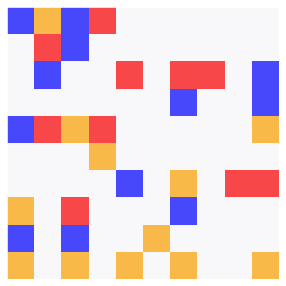

In [20]:
print(grid_agents.array)
grid_agents.draw()